# Conectando Bases

In [1]:
caminho_DB_DOTA = "/content/drive/MyDrive/Estudos Tecnologia/Python/DOTA/DB DOTA_.xlsx"

caminho_parametria_comercio = "/content/drive/MyDrive/Estudos Tecnologia/Python/DOTA/Parametria Comercio.xlsx"

caminho_reporte_FD = "/content/drive/MyDrive/Estudos Tecnologia/Python/DOTA/Reporte FD_.xlsx"

# Importando Ferramentas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Armazenando Variáveis para as Bases

In [3]:
df_dota = pd.read_excel(caminho_DB_DOTA)

df_parametria = pd.read_excel(caminho_parametria_comercio)

df_fd = pd.read_excel(caminho_reporte_FD)

## Utilizando as variáveis para checar os dados

In [4]:
display(df_dota.head(5))
display(df_fd.head(5))
display(df_parametria.head(5))

,CARD_FOUR_LAST_DIGITS,CARD_ISSUER_ID,CARD_ISSUER_NAME,CARD_SIX_FIRST_DIGITS,MOV_AMOUNT,MOV_CREATED_DATE,MOV_OPERATION,PAY_COLLECTOR_DOCUMENT,PAY_CURRENCY,PAY_MARKETPLACE,...,CAPTURE_MERCHANT_NUMBER,CAPTURE_MERCHANT_TRX_REFERENCE,PURCHASE_ACQUIRER,PURCHASE_AUTHORIZATION_CODE,PURCHASE_BATCH_ID,PURCHASE_GATEWAY_TRX_ID,PURCHASE_ID,PURCHASE_MERCHANT_NUMBER,PURCHASE_MERCHANT_TRX_REFERENCE,PURCHASE_STATUS
0,7978,1,Visa,588559,2600.0,2022-01-02T23:13:36-04:00,PAYMENT,2.021364e+10,ARS,NONE,...,NaN,NaN,Visa,932099,87.0,3.455300e+10,3.273268e+10,33106584.0,6059.0,approved
1,7976,1,Visa,558766,1709.0,2022-01-02T23:13:35-04:00,PAYMENT,2.034094e+10,ARS,NONE,...,NaN,NaN,Visa,711990,550.0,3.455300e+10,3.273267e+10,32827909.0,5785.0,approved
2,5979,1,Visa,569888,500.0,2022-01-02T23:13:37-04:00,PAYMENT,2.020107e+10,ARS,NONE,...,NaN,NaN,Visa,957843,83.0,3.455300e+10,3.273267e+10,33106584.0,6029.0,approved
3,5977,12433,Visa Ahora,595978,129999.0,2022-01-02T23:12:39-04:00,PAYMENT,3.070881e+10,ARS,NONE,...,48830723.0,9921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7896,316,BBVA,579555,4410.0,2022-01-02T23:12:38-04:00,PAYMENT,2.742115e+10,ARS,NONE,...,NaN,NaN,Visa,86,339.0,3.455300e+10,3.273268e+10,40326803.0,292.0,approved


,ID,EMPRESA,FPRES,TIPO_REG,NUM_COM,COD_OP,TIPO_APLIC,LOTE,COD_BCO,COD_CASA,...,NRO_LIQ,PORCDTO_ARANCEL,ARANCEL,SIGNO_ARANCEL,TNA,COSTO_FIN,SIGNO_CF,LIBRE,NUM_EST,PRODUCTO
0,1688213153,9137,2022-01-03,1,26364968,0005 - (A) comprob. de compra en $,+,726,914,1,...,466527,0.8,7.12,+,0.0,0.0,,90000 00,37017811,Debito
1,1688213154,9137,2022-01-03,1,26364968,0005 - (A) comprob. de compra en $,+,726,914,1,...,466527,0.8,0.80,+,0.0,0.0,,90000 00,37017811,Debito
2,1688213155,9137,2022-01-03,1,26364968,0005 - (A) comprob. de compra en $,+,726,914,1,...,466527,0.8,39.20,+,0.0,0.0,,90000 00,37017811,Debito
3,1688213156,9137,2022-01-03,1,26364968,0005 - (A) comprob. de compra en $,+,726,914,1,...,466527,0.8,6.58,+,0.0,0.0,,90000 00,37017811,Debito
4,1688213159,9137,2022-01-03,1,26364968,0005 - (A) comprob. de compra en $,+,726,914,1,...,466527,0.8,1.60,+,0.0,0.0,,90000 00,37017811,Debito


,COMERCIO,TIPO_COMERCIO,FEE,FECHA INICIO,FECHA FIN
0,8234815397,ESTANDAR,0.689656,2022-01-03,2022-01-04
1,8236841177,ESTANDAR,0.977712,2022-01-03,NaT
2,8354313702,ESTANDAR,0.167908,2022-01-03,NaT
3,8354313710,ESTANDAR,0.923751,2022-01-03,NaT
4,9133209072,ESTANDAR,0.988338,2022-01-03,NaT


### Checando as informações das tabelas/bd\

In [5]:
print("--- Info DOTA ---")
df_dota.info()

print("\n--- Info PD---")
df_fd.info()

print("n--- Info Parametria ---")
df_parametria.info()

--- Info DOTA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56152 entries, 0 to 56151
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CARD_FOUR_LAST_DIGITS            56152 non-null  int64  
 1   CARD_ISSUER_ID                   56152 non-null  int64  
 2   CARD_ISSUER_NAME                 56152 non-null  object 
 3   CARD_SIX_FIRST_DIGITS            56152 non-null  int64  
 4   MOV_AMOUNT                       56152 non-null  float64
 5   MOV_CREATED_DATE                 56152 non-null  object 
 6   MOV_OPERATION                    56152 non-null  object 
 7   PAY_COLLECTOR_DOCUMENT           53847 non-null  float64
 8   PAY_CURRENCY                     56152 non-null  object 
 9   PAY_MARKETPLACE                  56152 non-null  object 
 10  PAY_METHOD                       56152 non-null  object 
 11  PAY_TYPE                         56152 non-null  object 
 12  

# Instruções do Arquivo - Normalização DB DOTA

In [6]:
# 1 CARD_NUMBER = Você deve unir as colunas 'CARD_SIX_FIRST_DIGITS', O texto 'XXXXXX'  e a coluna 'CARD_FOUR_LAST_DIGITS'

# 2. GTWC_AUTHORIZATION_CODE = Se 'CAPTURE_AUTHORIZATION_CODE' for igual a '000000' y 'CAPTURE_ACQUIRER' = 'Cabal' você deve deixar o espaço em BRANCO,
# mas caso contrário, deve manter o dado como está na coluna 'CAPTURE_AUTHORIZATION_CODE'

# 3. GTWT_ACQUIRER = Você deve realizar uma validação nas colunas CAPTURE_ACQUIRER, PURCHASE_ACQUIRER e AUTH_ACQUIRER. Caso encontre as palavras 'Mastercard',
# 'Firstdata' ou 'Diners' em alguma dessas colunas, você deve colocar 'FD'. Se em alguma das colunas encontrar a palavra 'Visa', você deve colocar 'PRISMA'.
# Caso não encontre nenhum dos textos anteriores, você deve colocar o conteúdo dessas colunas em maiúsculas.


# 4. BRAND = Se na coluna 'PAY_METHOD' estiver o texto 'MASTER', 'MAESTRO', 'MASTERCARD' ou 'Master' você deve colocar 'MASTERCARD'
# Se não encontrar esses textos, deve identificar a marca de acordo com os seguintes parâmetros:
# - Se os 2 primeiros dígitos do cartão forem '34' o '37' -> 'AMERICAN EXPRESS'
# - Se o primeiro dígito do cartão for '5' o '2' -> 'MASTERCARD'
# - Se o primeiro dígito do cartão for '4' -> 'VISA'
# E, por fim, caso nenhuma validação seja cumprida, você deve colocar o texto 'PENDIENTE'

# 5. GTWT_MERCHANT_NUMBER = Você deve avaliar primeiro a lista de colunas PURCHASE_MERCHANT_NUMBER, CAPTURE_MERCHANT_NUMBER e
# AUTH_MERCHANT_NUMBER e identificar o registro em qual das três colunas tem informação. Esta validação deve ser realizada na ordem em que as colunas foram mencionadas anteriormente.
# Caso encontre informação em uma das três colunas, você deve colocar o dado como resultado da sua função. Caso contrário, deixe-o vazio.

# 6. MOV_CREATION_DATE = Você deve adicionar 1 dia à coluna 'MOV_CREATED_DATE' e remover a hora do formato.

In [7]:
# 1 CARD_NUMBER = Você deve unir as colunas 'CARD_SIX_FIRST_DIGITS', O texto 'XXXXXX'  e a coluna 'CARD_FOUR_LAST_DIGITS'

In [8]:
df_dota['CARD_NUMBER'] = df_dota['CARD_SIX_FIRST_DIGITS'].astype(str) + 'XXXXXX' + df_dota['CARD_FOUR_LAST_DIGITS'].astype(str)

df_dota['CARD_NUMBER']

,CARD_NUMBER
0,588559XXXXXX7978
1,558766XXXXXX7976
2,569888XXXXXX5979
3,595978XXXXXX5977
4,579555XXXXXX7896
...,...
56147,558765XXXXXX7896
56148,566869XXXXXX6668
56149,558766XXXXXX9977
56150,569888XXXXXX58


In [9]:
# 2. GTWC_AUTHORIZATION_CODE = Se 'CAPTURE_AUTHORIZATION_CODE' for igual a '000000' y 'CAPTURE_ACQUIRER' = 'Cabal' você deve deixar o espaço em BRANCO,
# mas caso contrário, deve manter o dado como está na coluna 'CAPTURE_AUTHORIZATION_CODE'

In [10]:
df_dota['GTWC_AUTHORIZATION_CODE'] = np.where((df_dota['CAPTURE_AUTHORIZATION_CODE'] == '000000') & (df_dota['CAPTURE_ACQUIRER'] == 'Cabal'), "", df_dota['CAPTURE_AUTHORIZATION_CODE'])

df_dota['GTWC_AUTHORIZATION_CODE']

,GTWC_AUTHORIZATION_CODE
0,NaN
1,NaN
2,NaN
3,86
4,NaN
...,...
56147,NaN
56148,NaN
56149,NaN
56150,NaN


In [11]:
# 3. GTWT_ACQUIRER = Você deve realizar uma validação nas colunas CAPTURE_ACQUIRER, PURCHASE_ACQUIRER e AUTH_ACQUIRER. Caso encontre as palavras 'Mastercard',
# 'Firstdata' ou 'Diners' em alguma dessas colunas, você deve colocar 'FD'. Se em alguma das colunas encontrar a palavra 'Visa', você deve colocar 'PRISMA'.
# Caso não encontre nenhum dos textos anteriores, você deve colocar o conteúdo dessas colunas em maiúsculas.

In [12]:
palavras_fd = ['MASTERCARD', 'FIRSTDATA', 'DINERS']

condicao_fd = (
    df_dota['CAPTURE_ACQUIRER'].astype(str).str.upper().isin(palavras_fd) |
    df_dota['PURCHASE_ACQUIRER'].astype(str).str.upper().isin(palavras_fd) |
    df_dota['AUTH_ACQUIRER'].astype(str).str.upper().isin(palavras_fd)
)

condicao_prisma = (
    (df_dota['CAPTURE_ACQUIRER'].astype(str).str.upper() == 'VISA') |
    (df_dota['PURCHASE_ACQUIRER'].astype(str).str.upper() == 'VISA') |
    (df_dota['AUTH_ACQUIRER'].astype(str).str.upper() == 'VISA')
)

df_dota['GTWT_ACQUIRER'] = np.select(
    [condicao_fd, condicao_prisma],
    ['FD', 'PRISMA'],
    default=df_dota['CAPTURE_ACQUIRER'].astype(str).str.upper()
)

display(df_dota[['CAPTURE_ACQUIRER', 'PURCHASE_ACQUIRER', 'AUTH_ACQUIRER', 'GTWT_ACQUIRER']])

,CAPTURE_ACQUIRER,PURCHASE_ACQUIRER,AUTH_ACQUIRER,GTWT_ACQUIRER
0,NaN,Visa,NaN,PRISMA
1,NaN,Visa,NaN,PRISMA
2,NaN,Visa,NaN,PRISMA
3,Visa,NaN,Visa,PRISMA
4,NaN,Visa,NaN,PRISMA
...,...,...,...,...
56147,NaN,Visa,NaN,PRISMA
56148,NaN,Visa,NaN,PRISMA
56149,NaN,Visa,NaN,PRISMA
56150,NaN,Visa,NaN,PRISMA


In [13]:
# revisão do resultado do código

resumo_gtwt_acquirer = df_dota['GTWT_ACQUIRER'].value_counts()

print("--- Resumo da Coluna GTWT_ACQUIRER ---")
print(resumo_gtwt_acquirer)

print("\n--- Valores originais em CAPTURE_ACQUIRER ---")
print(df_dota['CAPTURE_ACQUIRER'].value_counts(dropna=False))

print("\n--- Valores originais em PURCHASE_ACQUIRER ---")
print(df_dota['PURCHASE_ACQUIRER'].value_counts(dropna=False))

print("\n--- Valores originais em AUTH_ACQUIRER ---")
print(df_dota['AUTH_ACQUIRER'].value_counts(dropna=False))

--- Resumo da Coluna GTWT_ACQUIRER ---
GTWT_ACQUIRER
PRISMA    56152
Name: count, dtype: int64

--- Valores originais em CAPTURE_ACQUIRER ---
CAPTURE_ACQUIRER
NaN     52232
Visa     3920
Name: count, dtype: int64

--- Valores originais em PURCHASE_ACQUIRER ---
PURCHASE_ACQUIRER
Visa    52232
NaN      3920
Name: count, dtype: int64

--- Valores originais em AUTH_ACQUIRER ---
AUTH_ACQUIRER
NaN     52232
Visa     3920
Name: count, dtype: int64


In [14]:
# 4. BRAND = Se na coluna 'PAY_METHOD' estiver o texto 'MASTER', 'MAESTRO', 'MASTERCARD' ou 'Master' você deve colocar 'MASTERCARD'
# Se não encontrar esses textos, deve identificar a marca de acordo com os seguintes parâmetros:
# - Se os 2 primeiros dígitos do cartão forem '34' o '37' -> 'AMERICAN EXPRESS'
# - Se o primeiro dígito do cartão for '5' o '2' -> 'MASTERCARD'
# - Se o primeiro dígito do cartão for '4' -> 'VISA'
# E, por fim, caso nenhuma validação seja cumprida, você deve colocar o texto 'PENDIENTE'

In [15]:
pay_method_upper = df_dota['PAY_METHOD'].astype(str).str.upper()
cartao_str = df_dota['CARD_SIX_FIRST_DIGITS'].astype(str)

primeiros_2_digitos = cartao_str.str[:2]
primeiro_digito = cartao_str.str[0]

condicoes_brand = [
    pay_method_upper.isin(['MASTER', 'MAESTRO', 'MASTERCARD']),
    primeiros_2_digitos.isin(['34', '37']),
    primeiro_digito.isin(['5', '2']),
    primeiro_digito == '4'
]

resultados_brand = [
    'MASTERCARD',
    'AMERICAN EXPRESS',
    'MASTERCARD',
    'VISA'
]

df_dota['BRAND'] = np.select(condicoes_brand, resultados_brand, default='PENDIENTE')

In [16]:
# check

print(df_dota['BRAND'])

df_dota['BRAND'].value_counts()

0        MASTERCARD
1        MASTERCARD
2        MASTERCARD
3        MASTERCARD
4        MASTERCARD
            ...    
56147    MASTERCARD
56148    MASTERCARD
56149    MASTERCARD
56150    MASTERCARD
56151    MASTERCARD
Name: BRAND, Length: 56152, dtype: object


,count
BRAND,
MASTERCARD,56152


In [17]:
# 5. GTWT_MERCHANT_NUMBER = Você deve avaliar primeiro a lista de colunas PURCHASE_MERCHANT_NUMBER, CAPTURE_MERCHANT_NUMBER e
# AUTH_MERCHANT_NUMBER e identificar o registro em qual das três colunas tem informação. Esta validação deve ser realizada na ordem em que as colunas foram mencionadas anteriormente.
# Caso encontre informação em uma das três colunas, você deve colocar o dado como resultado da sua função. Caso contrário, deixe-o vazio.

In [18]:
colunas_alvo = ['PURCHASE_MERCHANT_NUMBER', 'CAPTURE_MERCHANT_NUMBER', 'AUTH_MERCHANT_NUMBER']

df_temp_gtwt_merchant = df_dota[colunas_alvo].replace(r'^\s*$', np.nan, regex=True)

df_dota['GTWT_MERCHANT_NUMBER'] = (
    df_temp_gtwt_merchant['PURCHASE_MERCHANT_NUMBER']
    .fillna(df_temp_gtwt_merchant['CAPTURE_MERCHANT_NUMBER'])
    .fillna(df_temp_gtwt_merchant['AUTH_MERCHANT_NUMBER'])
    .fillna("")
)

In [19]:
display(df_dota[['PURCHASE_MERCHANT_NUMBER', 'CAPTURE_MERCHANT_NUMBER', 'AUTH_MERCHANT_NUMBER', 'GTWT_MERCHANT_NUMBER']])

,PURCHASE_MERCHANT_NUMBER,CAPTURE_MERCHANT_NUMBER,AUTH_MERCHANT_NUMBER,GTWT_MERCHANT_NUMBER
0,33106584.0,NaN,NaN,33106584.0
1,32827909.0,NaN,NaN,32827909.0
2,33106584.0,NaN,NaN,33106584.0
3,NaN,48830723.0,48830723.0,48830723.0
4,40326803.0,NaN,NaN,40326803.0
...,...,...,...,...
56147,32827909.0,NaN,NaN,32827909.0
56148,39725643.0,NaN,NaN,39725643.0
56149,82341942.0,NaN,NaN,82341942.0
56150,37776721.0,NaN,NaN,37776721.0


In [20]:
# 6. MOV_CREATION_DATE = Você deve adicionar 1 dia à coluna 'MOV_CREATED_DATE' e remover a hora do formato.

In [21]:
data_somada = pd.to_datetime(df_dota['MOV_CREATED_DATE']) + pd.Timedelta(days=1)

df_dota['MOV_CREATION_DATE'] = data_somada.dt.date

display(df_dota[['MOV_CREATED_DATE', 'MOV_CREATION_DATE']].head(10))

,MOV_CREATED_DATE,MOV_CREATION_DATE
0,2022-01-02T23:13:36-04:00,2022-01-03
1,2022-01-02T23:13:35-04:00,2022-01-03
2,2022-01-02T23:13:37-04:00,2022-01-03
3,2022-01-02T23:12:39-04:00,2022-01-03
4,2022-01-02T23:12:38-04:00,2022-01-03
5,2022-01-02T23:13:10-04:00,2022-01-03
6,2022-01-02T23:13:08-04:00,2022-01-03
7,2022-01-02T23:13:40-04:00,2022-01-03
8,2022-01-02T23:13:37-04:00,2022-01-03
9,2022-01-02T23:13:38-04:00,2022-01-03


## Parametrização Comercios

Para realizar a comparação da parametrização de Comercios contra a DB DOTA, você deve utilizar a seguinte regra:

-----


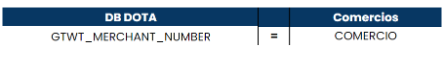

-----

Uma vez realizada a comparação com a parametrização, você deve filtrar apenas os registros que sejam TIPO_COMERCIO = 'ESTANDAR'.

In [25]:
df_dota ['KEY_MERCHANT'] = pd.to_numeric(df_dota['GTWT_MERCHANT_NUMBER'], errors='coerce')
df_parametria ['KEY_MERCHANT'] = pd.to_numeric(df_parametria['COMERCIO'], errors='coerce')

df_dota_parametrizado = pd.merge(
    df_dota,
    df_parametria,
    on='KEY_MERCHANT',
    how='left'
)

mascara_estandar = df_dota_parametrizado['TIPO_COMERCIO'] == 'ESTANDAR'
df_dota_filtro_comercio = df_dota_parametrizado[mascara_estandar].copy()

print(f"Linhas antes do filtro: {len(df_dota_parametrizado)}")
print(f"Linhas DEPOIS do filtro: {len(df_dota_filtro_comercio)}")
print("\n--- Amostra do Cruzamento ---")
display(df_dota_filtro_comercio[['GTWT_MERCHANT_NUMBER', 'COMERCIO', 'TIPO_COMERCIO', 'FEE']].head())

Linhas antes do filtro: 56152
Linhas DEPOIS do filtro: 56152

--- Amostra do Cruzamento ---


,GTWT_MERCHANT_NUMBER,COMERCIO,TIPO_COMERCIO,FEE
0,33106584.0,33106584,ESTANDAR,0.400715
1,32827909.0,32827909,ESTANDAR,0.983702
2,33106584.0,33106584,ESTANDAR,0.400715
3,48830723.0,48830723,ESTANDAR,0.878831
4,40326803.0,40326803,ESTANDAR,0.099002


## Normalização Reporte FD

1. LIQ_6_TARJETA = Extrair os primeiros 6 números do cartão (NUM_TAR)
2. LIQ_4_TARJETA = Extrair os últimos 4 números do cartão (NUM_TAR)

### Regras de conciliação

Para conseguir conciliar as 2 fontes de informação, as chaves de comparação que devem coincidir entre as 2 fontes são as seguintes:

---

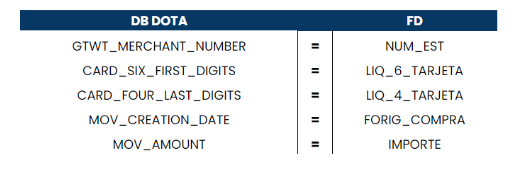

---

Espera-se obter o percentual de partidas conciliadas sobre o total das partidas de cada fonte. Ou seja, quanto foi conciliado da DB DOTA sobre o total de transações dessa fonte, e quanto foi conciliado de FD sobre o total de transações desta última. Além disso, os valores não conciliados e o montante de dinheiro correspondentes às duas categorias.

In [26]:
# Normalização da FD

num_tar_str = df_fd['NUM_TAR'].astype(str)

df_fd['LIQ_6_TARJETA'] = pd.to_numeric(num_tar_str.str[:6], errors='coerce')
df_fd['LIQ_4_TARJETA'] = pd.to_numeric(num_tar_str.str[-4:], errors='coerce')

display(df_fd[['NUM_TAR', 'LIQ_6_TARJETA', 'LIQ_4_TARJETA']].head())

,NUM_TAR,LIQ_6_TARJETA,LIQ_4_TARJETA
0,558766XXXXXX9569,558766,9569
1,558766XXXXXX6685,558766,6685
2,588559XXXXXX6995,588559,6995
3,588897XXXXXX9658,588897,9658
4,558766XXXXXX6988,558766,6988


In [28]:
# Conciliação DOTA x FD

# Padronização das chaves:

# chaves DOTA
df_dota_filtro_comercio['KEY_MERCHANT'] = pd.to_numeric(df_dota_filtro_comercio['GTWT_MERCHANT_NUMBER'], errors='coerce')
df_dota_filtro_comercio['KEY_6_DIGITS'] = pd.to_numeric(df_dota_filtro_comercio['CARD_SIX_FIRST_DIGITS'], errors='coerce')
df_dota_filtro_comercio['KEY_4_DIGITS'] = pd.to_numeric(df_dota_filtro_comercio['CARD_FOUR_LAST_DIGITS'], errors='coerce')
df_dota_filtro_comercio['KEY_DATE']     = pd.to_datetime(df_dota_filtro_comercio['MOV_CREATION_DATE']).dt.date
df_dota_filtro_comercio['KEY_AMOUNT']   = pd.to_numeric(df_dota_filtro_comercio['MOV_AMOUNT'], errors='coerce').round(2)

# chaves FD
df_fd['KEY_MERCHANT'] = pd.to_numeric(df_fd['NUM_EST'], errors='coerce')
df_fd['KEY_6_DIGITS'] = pd.to_numeric(df_fd['LIQ_6_TARJETA'], errors='coerce')
df_fd['KEY_4_DIGITS'] = pd.to_numeric(df_fd['LIQ_4_TARJETA'], errors='coerce')
df_fd['KEY_DATE']     = pd.to_datetime(df_fd['FORIG_COMPRA']).dt.date
df_fd['KEY_AMOUNT']   = pd.to_numeric(df_fd['IMPORTE'], errors='coerce').round(2)

# Cruzamento das chaves

colunas_chave = ['KEY_MERCHANT', 'KEY_6_DIGITS', 'KEY_4_DIGITS', 'KEY_DATE', 'KEY_AMOUNT']

df_conciliacao = pd.merge(
    df_dota_filtro_comercio,
    df_fd,
    on=colunas_chave,
    how='outer',
    indicator=True
)

print("--- Status da Conciliação Geral ---")

status_traduzido = df_conciliacao['_merge'].map({
    'both': '✅ CONCILIADO (Bateu DOTA e FD)',
    'left_only': '❌ SOBROU NO DOTA (Falta no FD)',
    'right_only': '❌ SOBROU NO FD (Falta no DOTA)'
})

print(status_traduzido.value_counts())

--- Status da Conciliação Geral ---
_merge
❌ SOBROU NO DOTA (Falta no FD)    32694
✅ CONCILIADO (Bateu DOTA e FD)    25727
❌ SOBROU NO FD (Falta no DOTA)    15413
Name: count, dtype: int64


## Relatório da conciliação

In [29]:
conciliados = df_conciliacao[df_conciliacao['_merge'] == 'both']
sobrou_dota = df_conciliacao[df_conciliacao['_merge'] == 'left_only']
sobrou_fd   = df_conciliacao[df_conciliacao['_merge'] == 'right_only']

total_linhas_dota = len(conciliados) + len(sobrou_dota)
total_linhas_fd   = len(conciliados) + len(sobrou_fd)

pct_conciliado_dota = (len(conciliados) / total_linhas_dota) * 100
pct_conciliado_fd   = (len(conciliados) / total_linhas_fd) * 100

dinheiro_falta_fd = sobrou_dota['KEY_AMOUNT'].sum() # DOTA tem, FD não tem
dinheiro_sobra_fd = sobrou_fd['KEY_AMOUNT'].sum()   # FD tem, DOTA não tem

print("="*50)
print("📊 RESULTADOS DA CONCILIAÇÃO FINANCEIRA".center(50))
print("="*50)

print(f"\n✅ TAXA DE SUCESSO:")
print(f" -> {pct_conciliado_dota:.2f}% das transações do DOTA foram conciliadas.")
print(f" -> {pct_conciliado_fd:.2f}% das transações do FD foram conciliadas.")

print(f"\n❌ NÃO CONCILIADOS (RISCO FINANCEIRO):")
print(f" -> DOTA sem par no FD: {len(sobrou_dota)} transações")
print(f"    Montante Financeiro: $ {dinheiro_falta_fd:,.2f}")

print(f"\n -> FD sem par no DOTA: {len(sobrou_fd)} transações")
print(f"    Montante Financeiro: $ {dinheiro_sobra_fd:,.2f}")
print("="*50)

      📊 RESULTADOS DA CONCILIAÇÃO FINANCEIRA      

✅ TAXA DE SUCESSO:
 -> 44.04% das transações do DOTA foram conciliadas.
 -> 62.54% das transações do FD foram conciliadas.

❌ NÃO CONCILIADOS (RISCO FINANCEIRO):
 -> DOTA sem par no FD: 32694 transações
    Montante Financeiro: $ 81,923,293.78

 -> FD sem par no DOTA: 15413 transações
    Montante Financeiro: $ 35,919,382.90


## Controle de Excesso de Cash In

Para realizar o controle de excesso de Cash In, primeiro você deve criar uma Tabela Dinâmica onde agrupe por 'PAY_COLECTOR_DOCUMENT' e tomando como valor o Importe (soma). Depois, você deve aplicar a lógica que está explicada na tabela inferior no resultado agrupado da Tabela Dinâmica.

---

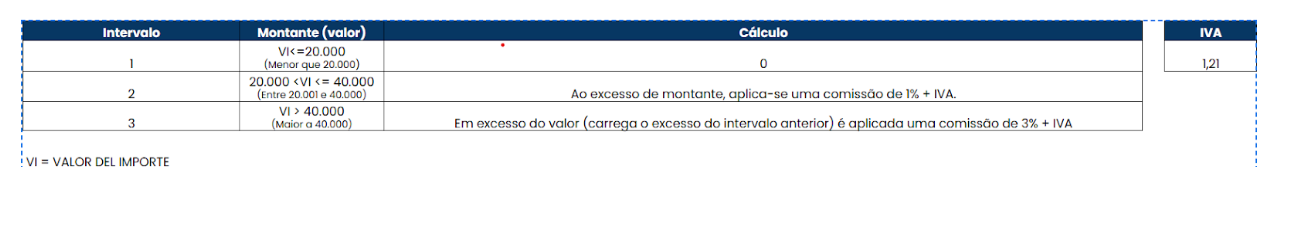

In [30]:
df_cash_in = df_dota.groupby('PAY_COLLECTOR_DOCUMENT')['MOV_AMOUNT'].sum().reset_index()
df_cash_in.rename(columns={'MOV_AMOUNT': 'VALOR_IMPORTE'}, inplace=True)

# cálculo das taxas

def calcular_excesso_cash_in(vi):
    iva = 1.21 # IVA de 21%

    if vi <= 20000:
        return 0.0

    elif vi <= 40000:
        # Paga 1% apenas sobre o que exceder 20k
        comissao = (vi - 20000) * 0.01
        return comissao * iva

    else:
        # Paga a taxa máxima da faixa anterior (20k * 1% = 200) + 3% sobre o que exceder 40k
        comissao_faixa2 = 200.0
        comissao_faixa3 = (vi - 40000) * 0.03
        return (comissao_faixa2 + comissao_faixa3) * iva

# aplicação das taxas nas transações
df_cash_in['COMISSAO_CASH_IN'] = df_cash_in['VALOR_IMPORTE'].apply(calcular_excesso_cash_in)

# ordenação dos valores
df_cash_in_ordenado = df_cash_in.sort_values(by='COMISSAO_CASH_IN', ascending=False)

print("--- TOP 5 CLIENTES COM MAIOR EXCESSO DE CASH IN ---")
display(df_cash_in_ordenado.head())

print(f"\nTotal de clientes cobrados: {len(df_cash_in_ordenado[df_cash_in_ordenado['COMISSAO_CASH_IN'] > 0])}")
print(f"Total de comissão gerada p/ empresa: $ {df_cash_in_ordenado['COMISSAO_CASH_IN'].sum():,.2f}")

--- TOP 5 CLIENTES COM MAIOR EXCESSO DE CASH IN ---


,PAY_COLLECTOR_DOCUMENT,VALOR_IMPORTE,COMISSAO_CASH_IN
17766,3.065986e+10,6395891.24,230960.852012
18501,3.071180e+10,2431523.19,87054.291797
17964,3.070309e+10,1807386.90,64398.144470
19491,3.071662e+10,902547.09,31552.459367
18417,3.071107e+10,678292.32,23412.011216



Total de clientes cobrados: 1055
Total de comissão gerada p/ empresa: $ 1,392,404.73


# Dashboards


/tmp/ipython-input-499074347.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='DOC_MASCARADO', y='COMISSAO_CASH_IN', ax=ax[1], palette='Blues_r', errorbar=None)


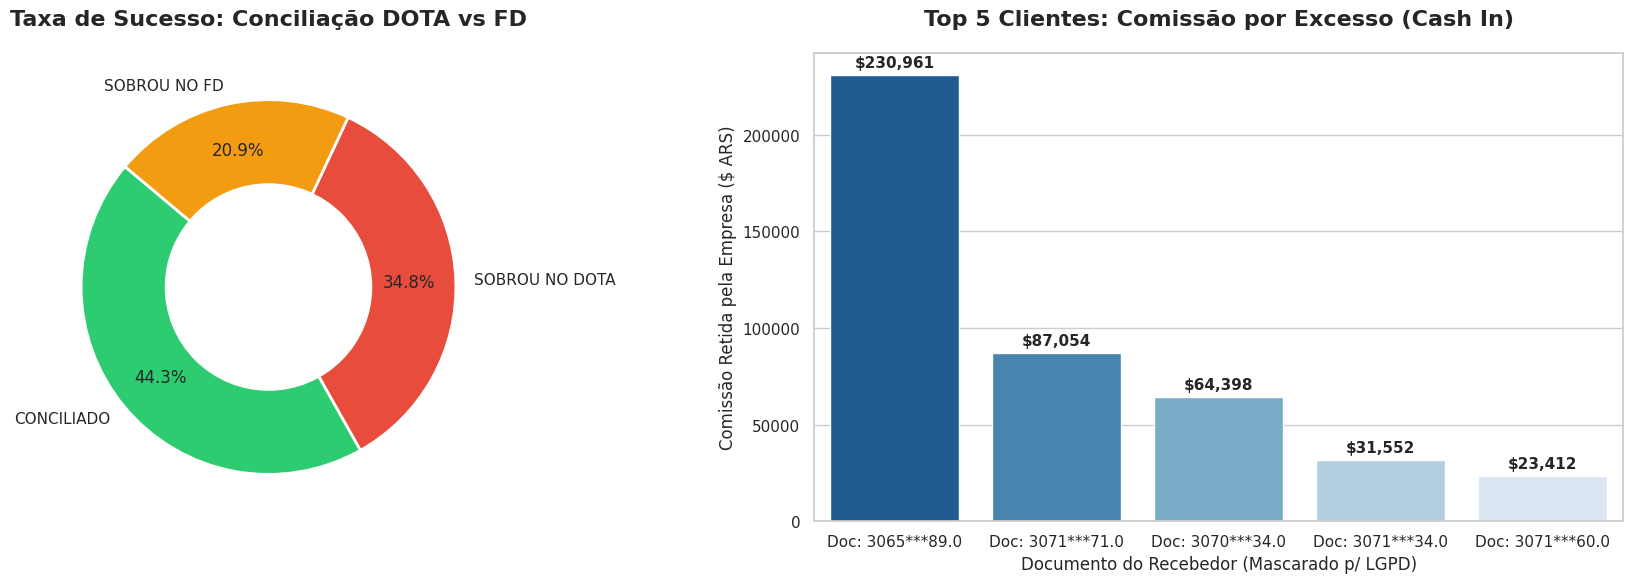

In [33]:
# config. estilo
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Status da Conciliação (Rosca)
cores = ['#2ecc71', '#e74c3c', '#f39c12']
labels_limpas = ['CONCILIADO', 'SOBROU NO DOTA', 'SOBROU NO FD']
valores = status_traduzido.value_counts().values

ax[0].pie(valores, labels=labels_limpas, autopct='%1.1f%%', startangle=140, colors=cores,
          wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.75)

centro = plt.Circle((0,0), 0.55, fc='white')
ax[0].add_artist(centro)
ax[0].set_title('Taxa de Sucesso: Conciliação DOTA vs FD', fontsize=16, fontweight='bold', pad=20)


# Gráfico 2: Top 5 Clientes - Excesso Cash In (Barras)
top_5 = df_cash_in_ordenado.head(5).copy()
top_5['DOC_MASCARADO'] = 'Doc: ' + top_5['PAY_COLLECTOR_DOCUMENT'].astype(str).str[:4] + '***' + top_5['PAY_COLLECTOR_DOCUMENT'].astype(str).str[-4:]

sns.barplot(data=top_5, x='DOC_MASCARADO', y='COMISSAO_CASH_IN', ax=ax[1], palette='Blues_r', errorbar=None)
ax[1].set_title('Top 5 Clientes: Comissão por Excesso (Cash In)', fontsize=16, fontweight='bold', pad=20)
ax[1].set_xlabel('Documento do Recebedor (Mascarado p/ LGPD)', fontsize=12)
ax[1].set_ylabel('Comissão Retida pela Empresa ($ ARS)', fontsize=12)

for p in ax[1].patches:
    ax[1].annotate(f"${p.get_height():,.0f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9),
                   textcoords='offset points', fontsize=11, fontweight='bold')


plt.tight_layout()
plt.show()